In [0]:
import torch
import torchvision

In [0]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


In [0]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [0]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [0]:
from google.colab import drive

# mount your Google Drive
drive.mount("/content/gdrive") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr = 5e-6)

In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [0]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/content/gdrive/My Drive/ADAM_fashion_mnist.pth')
      #torch.save(optimizer.state_dict(), '/content/gdrive/My Drive/optimizer.pth')

In [0]:
A_Ac = []
A_loss = []
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  x=100. * correct / len(test_loader.dataset)
  A_Ac.append(x)
  y = test_loss
  A_loss.append(y)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [0]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327588
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.304439
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.277918
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.289771
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.304795
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.304536
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.274854
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.294185
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.285943
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.274101
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.332455
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.350589
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.302422
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.339313
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.294903
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.290521
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.320195
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.300644
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.314767
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.326088
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.2448, Accuracy: 2934/10000 (29%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.285874
Train Epoch: 2 [640/60000 (1%)]	Loss: 2.277039
Train Epoch: 2 [1280/60000 (2%)]	Loss: 2.221310
Train Epoch: 2 [1920/60000 (3%)]	Loss: 2.292939
Train Epoch: 2 [2560/60000 (4%)]	Loss: 2.264966
Train Epoch: 2 [3200/60000 (5%)]	Loss: 2.291747
Train Epoch: 2 [3840/60000 (6%)]	Loss: 2.281907
Train Epoch: 2 [4480/60000 (7%)]	Loss: 2.222980
Train Epoch: 2 [5120/60000 (9%)]	Loss: 2.265569
Train Epoch: 2 [5760/60000 (10%)]	Loss: 2.213519
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.249406
Train Epoch: 2 [7040/60000 (12%)]	Loss: 2.255731
Train Epoch: 2 [7680/60000 (13%)]	Loss: 2.234193
Train Epoch: 2 [8320/60000 (14%)]	Loss: 2.275451
Train Epoch: 2 [8960/60000 (15%)]	Loss: 2.260328
Train Epoch: 2 [9600/60000 (16%)]	Loss: 2.247099
Train Epoch: 2 [10240/60000 (17%)]	Loss: 2.266334
Train Epoch: 2 [10880/60000 (18%)]	Loss: 2.260154
Train Epoch: 2 [11520/60000 (19%)]	Loss: 2.231604
Train Epoch: 2 [12160

In [0]:
class AdamE(optim.Optimizer):
    r"""Implements AdamE with enforced decay algorithm.
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 M=10, weight_decay=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0 <= M:
            raise ValueError("Invalid M value: {}".format(M))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps, M=M,
                        weight_decay=weight_decay)
        super(AdamE, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamE, self).__setstate__(state)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
             closure (callable, optional): A closure that reevaluates the model
                 and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # moving average of gradient values(Exponential moving average of gradient values)
                    state['avg'] = torch.zeros_like(p.data) 
                    # moving average of squared gradient values(Exponential moving average of squared gradient values)
                    state['avg_sq'] = torch.zeros_like(p.data)
                    # t - M + 1 step gradient
                    state['t_M_1'] = torch.zeros_like(p.data)

                avg, avg_sq = state['avg'], state['avg_sq']
                t_M_1 = state['t_M_1']
                beta1, beta2 = group['betas']
                M = group['M']
                
                factor = 1./M

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad.add_(group['weight_decay'], p.data)

                if state['step'] == 1: # do it manually at the first iteration
                    avg.add_(grad, alpha=factor) # avg_at_t = avg_at_t-1 + (1/M) * grad
                    avg_sq.addcmul_(grad, grad, value=factor)
                    t_M_1.add_(grad)
                elif not state['step'] % (M + 1):
                    # do averaging at M + 1 iteration
                    grad.add_(-t_M_1, alpha=factor) # change gradients to (1/M) * (x[n] - x[n-M+1])
                    avg.add_(grad, alpha=factor) # avg_at_t = avg_at_t-1 + (1/M) * grad
                    avg_sq.addcmul_(grad, grad, value=factor)
                    
                    t_M_1 = torch.zeros_like(grad)
                    t_M_1.add_(grad)
                else:
                    avg.add_(grad, alpha=factor) # avg_at_t = avg_at_t-1 + (1/M) * grad
                    avg_sq.addcmul_(grad, grad, value=factor) # do the same but grad^2

                denom = (avg_sq.sqrt() * M).add_(group['eps'])
                step_size = group['lr'] * M
                p.data.addcdiv_(-step_size, avg, denom)
                
                if not state['step'] % (M + 1):
                    # To think - do we need to reset
                    # averages buffers after averaging?
                    avg = torch.zeros_like(grad)
                    avg_sq = torch.zeros_like(grad)

        return loss

In [0]:
optimizer2 = AdamE(network.parameters(),M = 20,lr = 5e-6)

In [0]:

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer2.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      
      torch.save(network.state_dict(), '/content/gdrive/My Drive/ADAM_fashion_mnist.pth')
      #torch.save(optimizer.state_dict(), '/content/gdrive/My Drive/optimizer.pth')

In [0]:
Ae_Ac = []
Ae_loss = []
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  a = 100. * correct / len(test_loader.dataset)
  Ae_Ac.append(a)
  b = test_loss
  Ae_loss.append(b)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [0]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 1.127023
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.176013
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.414328
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.381539
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.356773
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.449916
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.099642
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.484331
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.203590
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.190385
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.263800
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.143440
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.310117
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.172953
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.386754
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.292761
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.415061
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.192610
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.374533
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.237222
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.5790, Accuracy: 8617/10000 (86%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.069199
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.780104
Train Epoch: 2 [1280/60000 (2%)]	Loss: 1.036013
Train Epoch: 2 [1920/60000 (3%)]	Loss: 1.007710
Train Epoch: 2 [2560/60000 (4%)]	Loss: 1.025588
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.811274
Train Epoch: 2 [3840/60000 (6%)]	Loss: 1.240506
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.978082
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.738906
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.844650
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.068081
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.846423
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.832825
Train Epoch: 2 [8320/60000 (14%)]	Loss: 1.258575
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.891228
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.810048
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.976703
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.735221
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.856416
Train Epoch: 2 [12160

**Plot of Accuracy vs Epochs**

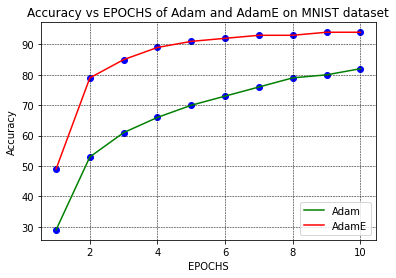

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(epochhh,A_Ac,color = 'green')
plt.scatter(epochhh,A_Ac,color = 'blue')
plt.plot(epochhh,Ae_Ac,color = 'red')
plt.scatter(epochhh,Ae_Ac,color = 'blue')
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(["Adam","AdamE"],loc="lower right")
plt.title("Accuracy vs EPOCHS of Adam and AdamE on MNIST dataset")

plt.grid(color='black', linestyle='--', linewidth=0.5)

**Plot of Loss vs Epoch**

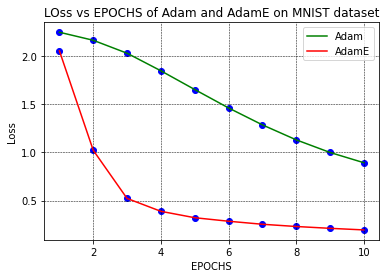

In [2]:
plt.plot(epochhh,A_loss,color = 'green')
plt.scatter(epochhh,A_loss,color = 'blue')
plt.plot(epochhh,Ae_loss,color = 'red')
plt.scatter(epochhh,Ae_loss,color = 'blue')

plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(["Adam","AdamE"],loc="lower right")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend(["Adam","AdamE"],loc="upper right")
plt.title("LOss vs EPOCHS of Adam and AdamE on MNIST dataset")

plt.grid(color='black', linestyle='--', linewidth=0.5)